In [61]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [76]:
SGA = Table.read("/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits")

In [77]:
SGA['G_MAG_SB26'][SGA['G_MAG_SB26'] >= 40] = np.nan

In [79]:
Green = SGA['G_MAG_SB26']
Red= SGA['R_MAG_SB26']
Z= SGA['Z_MAG_SB26']

SGA['G_MAG_SB26'][SGA['G_MAG_SB26'] == -1] = np.nan
SGA['R_MAG_SB26'][SGA['R_MAG_SB26'] == -1] = np.nan
SGA['Z_MAG_SB26'][SGA['Z_MAG_SB26'] == -1] = np.nan

gr = SGA['G_MAG_SB26']-SGA['R_MAG_SB26']
rz = SGA['R_MAG_SB26']-SGA['Z_MAG_SB26']
gz = SGA['G_MAG_SB26']-SGA['Z_MAG_SB26']


In [80]:
SGA.add_column(col= gr, name ="g_r")
SGA.add_column(col= rz, name ="r_z")
SGA.add_column(col= gz, name ="g_z")

In [81]:
SGA

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0,0.8453007,0.6245527,1.4698534
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20

In [82]:
SGA.write('SGA_colorindex.fits', overwrite = True)

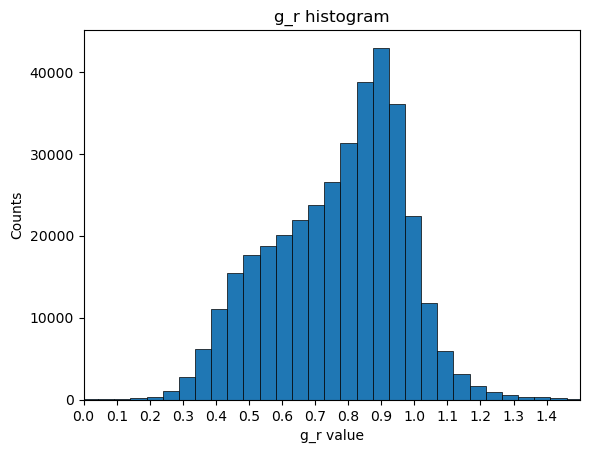

In [83]:
gr = SGA_colorindex['G_MAG_SB26']-SGA_colorindex['R_MAG_SB26']
plt.hist(gr, bins= 1000, edgecolor='black', linewidth=0.5)
plt.title("g_r histogram")
plt.ylabel('Counts')
plt.xlabel('g_r value')
plt.xlim([0, 1.5])
plt.xticks(np.arange(0, 1.5, 0.1))

plt.savefig('g_r.png')
plt.show()
plt.close()

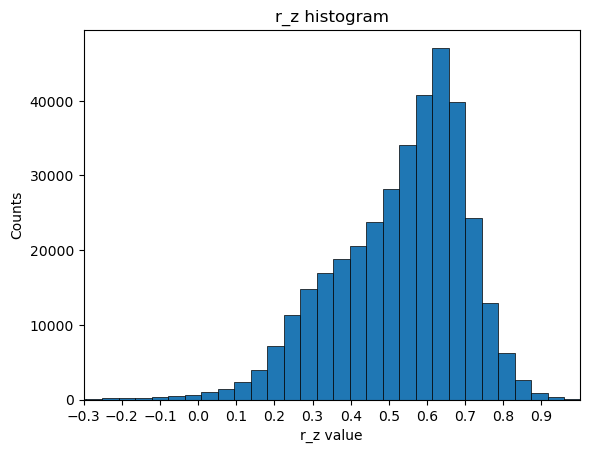

In [84]:
rz = SGA_colorindex['R_MAG_SB26']-SGA_colorindex['Z_MAG_SB26']
plt.hist(rz, bins=1000, edgecolor='black', linewidth=0.5)
plt.title("r_z histogram")
plt.ylabel('Counts')
plt.xlabel('r_z value')
plt.xlim([-0.3, 1])
plt.xticks(np.arange(-0.3, 1, 0.1))

plt.savefig('r_z.png')
plt.show()
plt.close()

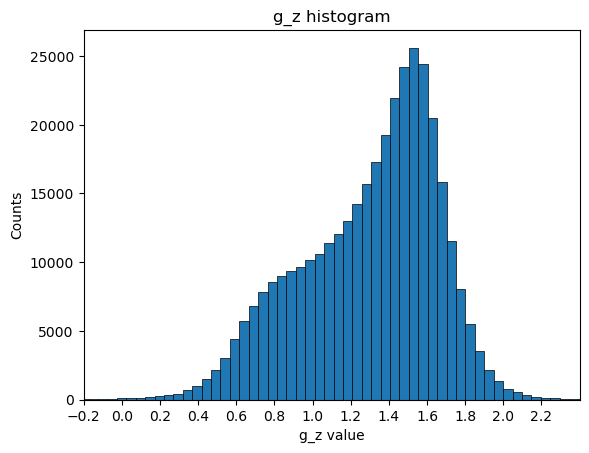

In [85]:
gz = SGA_colorindex['G_MAG_SB26']-SGA_colorindex['Z_MAG_SB26']
plt.hist(gz, bins=1000, edgecolor='black', linewidth=0.5)
plt.title("g_z histogram")
plt.ylabel('Counts')
plt.xlabel('g_z value')
plt.xlim([-0.2,2.4])
plt.xticks(np.arange(-0.2, 2.4, 0.2))

plt.savefig('g_z.png')
plt.show()
plt.close()